# K-Fold split

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [5]:
#Image CLASS-ID SPECIES BREED ID
#ID: 1:37 Class ids
#SPECIES: 1:Cat 2:Dog
#BREED ID: 1-25:Cat 1:12:Dog
#All images with 1st letter as captial are cat images
#images with small first letter are dog images

df = pd.read_csv('data/annotations/list.txt', skiprows=6, delimiter=' ', header=None)
df.columns = ['file_name', 'id', 'species', 'breed']
df

,file_name,id,species,breed
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [3]:
from sklearn.model_selection import KFold

In [6]:
df['fold'] = -1
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for idx, (t, v) in enumerate(kf.split(df), 1):
    print(t, v, len(v))
    df.loc[v, 'fold'] = idx

[   1    2    3 ... 7346 7347 7348] [   0    8   14 ... 7339 7341 7345] 1470
[   0    1    2 ... 7346 7347 7348] [  12   15   26 ... 7340 7342 7344] 1470
[   0    1    2 ... 7345 7346 7348] [   6    7   18 ... 7333 7343 7347] 1470
[   0    3    4 ... 7345 7347 7348] [   1    2   10 ... 7335 7336 7346] 1470
[   0    1    2 ... 7345 7346 7347] [   3    4    5 ... 7334 7338 7348] 1469


In [8]:
fold = 1
print(len(df[df['fold'] != fold]))
print(len(df[df['fold'] == fold]))

5879
1470


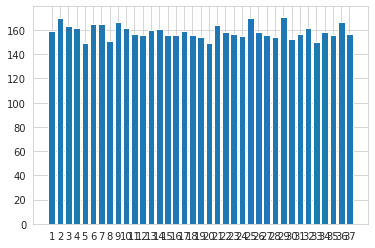

In [10]:
value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()
plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)
plt.show()

In [11]:
from sklearn.model_selection import StratifiedKFold

In [13]:
df['fold'] = -1
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for idx, (t, v) in enumerate(skf.split(df, df['id']), 1):
    print(t, v, len(v))
    df.loc[v, 'fold'] = idx

[   0    1    3 ... 7346 7347 7348] [   2    7    8 ... 7326 7337 7345] 1470
[   1    2    3 ... 7346 7347 7348] [   0   12   13 ... 7323 7335 7339] 1470
[   0    2    3 ... 7345 7347 7348] [   1   14   19 ... 7341 7343 7346] 1470
[   0    1    2 ... 7346 7347 7348] [   3    4    5 ... 7334 7338 7342] 1470
[   0    1    2 ... 7343 7345 7346] [   9   21   23 ... 7344 7347 7348] 1469


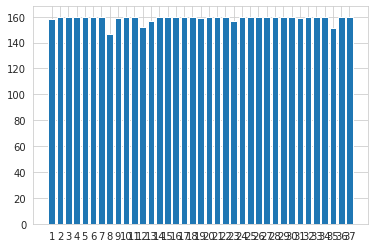

In [18]:
value_counts = df[df['fold'] != 1]['id'].value_counts().sort_index()
plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)
plt.show()

In [19]:
df.to_csv('./data/kfolds.csv', index=False)